In [1]:
import json

import pandas as pd
import matplotlib.pyplot as plt

## Checking out charts

In [2]:
with open("the-graph.json") as graph_json:
    data = json.load(graph_json)

In [3]:
prices = data["prices"]

In [4]:
df = pd.DataFrame(prices, columns=["unix_ts", "price"])
df.dtypes

unix_ts      int64
price      float64
dtype: object

The timestamp arrives in milliseconds:

In [5]:
df["timestamp"] = pd.to_datetime(df["unix_ts"], unit='ms')

mindate = df["timestamp"].min().date()
maxdate = df["timestamp"].max().date()

print(f"Earliest Date: {mindate}")
print(f"Latest Date: {maxdate}")

Earliest Date: 2020-12-17
Latest Date: 2021-02-17


In [6]:
df.head()

,unix_ts,price,timestamp
0,1608228816953,0.135246,2020-12-17 18:13:36.953
1,1608232109255,0.132723,2020-12-17 19:08:29.255
2,1608235767502,0.133249,2020-12-17 20:09:27.502
3,1608239204556,0.115321,2020-12-17 21:06:44.556
4,1608243223891,0.118031,2020-12-17 22:13:43.891


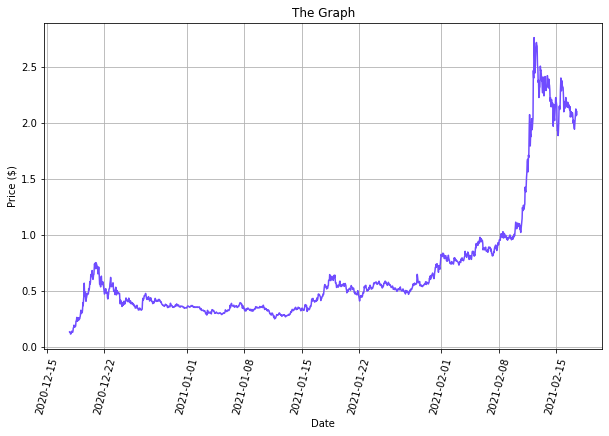

In [7]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(df["timestamp"], df["price"], c="#6F4CFF")
ax.set(xlabel="Date", ylabel="Price ($)",
       title="The Graph")
ax.grid(b=True)

plt.xticks(rotation=75)
plt.show()

Will need to get prices for chosen intervals. For the sake of testing/demonstration, will use a seven day interval. I chose fridays somewhat arbitrarily as I tend not to pay attention to crypto as much on weekends.

In [56]:
seven_days = pd.date_range(start=df["timestamp"].min().date(), 
                           end=df["timestamp"].max().date(),
                           freq="W-FRI")
seven_days

DatetimeIndex(['2020-12-18', '2020-12-25', '2021-01-01', '2021-01-08',
               '2021-01-15', '2021-01-22', '2021-01-29', '2021-02-05',
               '2021-02-12'],
              dtype='datetime64[ns]', freq='W-FRI')

In [89]:
prices = []

for d in seven_days:
    cond = df["timestamp"].dt.date == d
    max_date = df.loc[cond]["timestamp"].max()
    prices.append(df.loc[df["timestamp"] == max_date]["price"].values[0])

In [92]:
prices

[0.2509304120221865,
 0.37226956898545,
 0.35649295255114566,
 0.3345424595174541,
 0.3395026585888461,
 0.49998483344339223,
 0.5610680565511867,
 0.9400942337645702,
 2.320648599263097]

In [91]:
# get growths

changes = []

for i in range(len(prices)-1):
    growth = (prices[i+1] - prices[i]) / prices[i]
    changes.append(growth)

changes

[0.4835569988724006,
 -0.0423795489846256,
 -0.06157342768379791,
 0.01482681474437242,
 0.47269784431614037,
 0.1221701520166417,
 0.6755440321147647,
 1.468527638947589]